In [8]:
import sys
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, entropy
from densne import run_densne

### Generate data over the 2D grid and plot

In [9]:
# Generate data over the 2D grid (uniform)
NUM_POINTS = 10000
t_U = np.random.uniform(3, 15, NUM_POINTS)
X_U = np.zeros((NUM_POINTS, 2))
X_U[:, 0] = 0.04 * t_U * np.sin(t_U) + np.random.normal(0, 0.01, NUM_POINTS)
X_U[:, 1] = 0.04 * t_U * np.cos(t_U) + np.random.normal(0, 0.01, NUM_POINTS)

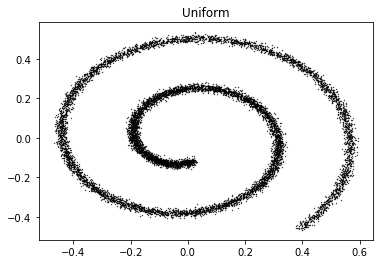

In [10]:
plt.scatter(X_U[:, 0], X_U[:, 1], c='k', marker='.', s=0.5)
plt.title('Uniform')
plt.show()

### Manifold Learning using densne

In [11]:
emb, ro, re = run_densne(X_U, no_dims=1, perplexity=3, verbose=False, initial_dims=X_U.shape[1],
                         dens_frac=0.3, use_pca=False, max_iter=1000, dens_lambda=0.2,
                         final_dens=True)

In [12]:
# Kernel density estimation for emb (Gaussian)
params = {'bandwidth': np.logspace(-1, 3, 40)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(emb)
print("best bandwidth 1d: {0}".format(grid.best_estimator_.bandwidth))
kde = grid.best_estimator_

best bandwidth 1d: 14.251026703029977


In [17]:
# Plot the orginial distribution and kde
xplot = np.linspace(3, 15, 300).reshape(-1,1)
den_u = uniform.pdf(xplot, 3 , 12)

xplot_l = np.linspace(-150, 150, 7500).reshape(-1,1)
den_kde = kde.score_samples(xplot_l)

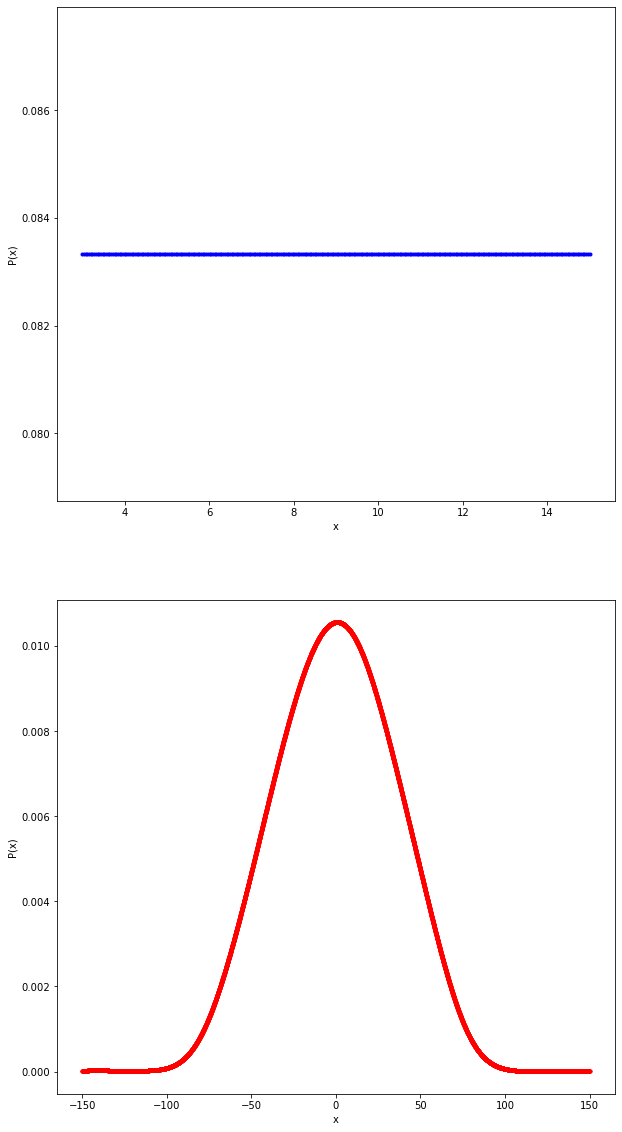

In [18]:
fig, ax = plt.subplots(2,1,figsize=[10,20])
ax[0].plot(xplot, den_u, marker='.', linewidth=0.001, c="b", label='Uniform')
ax[1].plot(xplot_l, np.exp(den_kde), marker='.', linewidth=0.001, c="r", label='KDE')

ax[0].tick_params(labelsize = 10)
ax[1].tick_params(labelsize = 10)

ax[0].set_ylabel('P(x)')
ax[1].set_ylabel('P(x)')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

plt.show()

In [15]:
# compute KL divergence
KL  = entropy(uniform.pdf(xplot_l,3,12).flatten(), np.exp(den_kde))
print("KL divergence: {0}".format(KL))

KL divergence: 2.091097041172846


In [16]:
# compute ANLL
ANLL = -np.mean(np.log(np.exp(den_kde)[np.exp(den_kde) != 0]))
print("ANLL: {0}".format(ANLL))

ANLL: 7.527653249233998


In [19]:
# Kernel density estimation for emb (Gaussian)
params = {'bandwidth': np.logspace(-1, 3, 40)}
grid = GridSearchCV(KernelDensity(kernel='tophat'), params)
grid.fit(emb)
print("best bandwidth 1d: {0}".format(grid.best_estimator_.bandwidth))
kde = grid.best_estimator_

best bandwidth 1d: 151.17750706156616


/home/nan/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:813: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


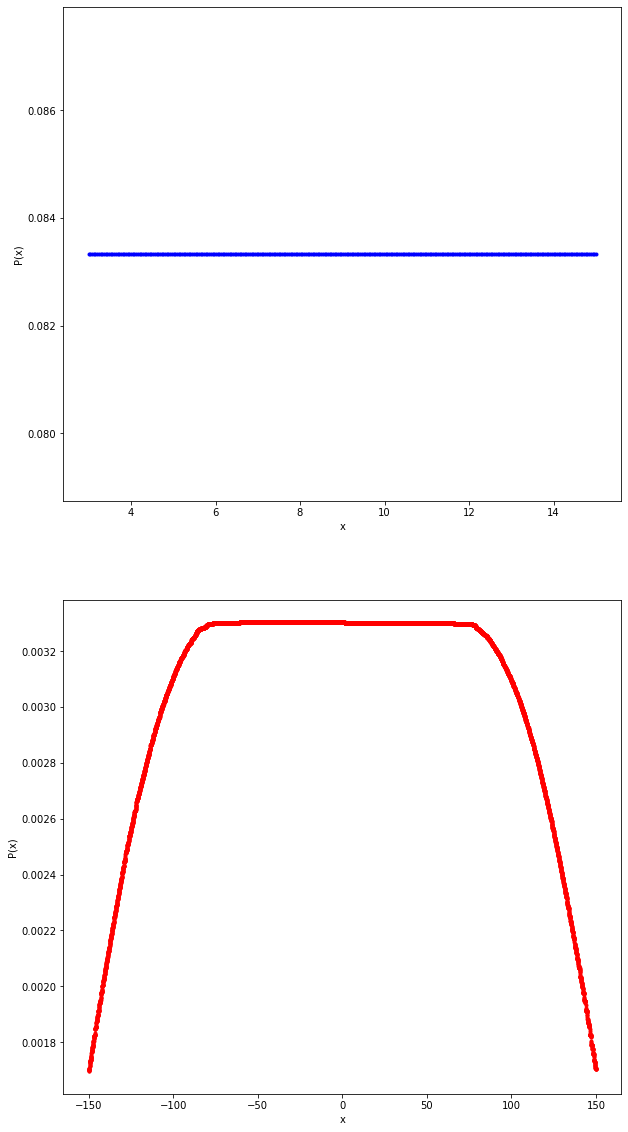

In [22]:
# Plot the orginial distribution and kde
xplot = np.linspace(3, 15, 300).reshape(-1,1)
den_u_t = uniform.pdf(xplot, 3 , 12)

xplot_l = np.linspace(-150, 150, 7500).reshape(-1,1)
den_kde_t = kde.score_samples(xplot_l)

fig, ax = plt.subplots(2,1,figsize=[10,20])
ax[0].plot(xplot, den_u_t, marker='.', linewidth=0.001, c="b", label='Uniform')
ax[1].plot(xplot_l, np.exp(den_kde_t), marker='.', linewidth=0.001, c="r", label='KDE')

ax[0].tick_params(labelsize = 10)
ax[1].tick_params(labelsize = 10)

ax[0].set_ylabel('P(x)')
ax[1].set_ylabel('P(x)')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

plt.show()

In [23]:
# compute KL divergence
KL_t  = entropy(uniform.pdf(xplot_l,3,12).flatten(), np.exp(den_kde_t))
print("KL divergence: {0}".format(KL_t))

# compute ANLL
ANLL_t = -np.mean(np.log(np.exp(den_kde_t)[np.exp(den_kde_t) != 0]))
print("ANLL: {0}".format(ANLL_t))

KL divergence: 3.1305631289561795
ANLL: 5.814626923683584
